# Linear Classifiers

Ett företag har fått in ett större parti av två typer färg. De har olika användningsområden men är mycket snarlika. Tyvärr har typerna blandats ihop i lagret och burkarna har ingen etikett. Ett mindre parti som ställdes undan vid avlastning har dock känd typ.

Vår uppgift är att, givet denna mindre kända mängd typer utveckla ett program som kan klassifiera en okänd färg genom att mäta luftfuktigheten och färgens avdunstning. Tanken är att testa många färger samtidigt-- den biten har de på golvet redan löst. Allt som saknas är en klassifikator.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

data = pd.read_csv("../data/paint.csv")

data.head()

,Relative humidity (%),type,Evaporation (% wt)
0,35.3,1,11.2
1,29.6,1,11.0
2,31.0,1,12.6
3,58.0,1,8.3
4,62.0,1,10.1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Relative humidity (%)  31 non-null     float64
 1   type                   31 non-null     int64  
 2   Evaporation (% wt)     31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 876.0 bytes


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative humidity (%),31.0,52.470968,16.479972,28.0,37.2,56.0,70.0,77.0
type,31.0,0.516129,0.508001,0.0,0.0,1.0,1.0,1.0
Evaporation (% wt),31.0,8.045161,2.453547,4.0,6.0,8.0,9.3,13.0


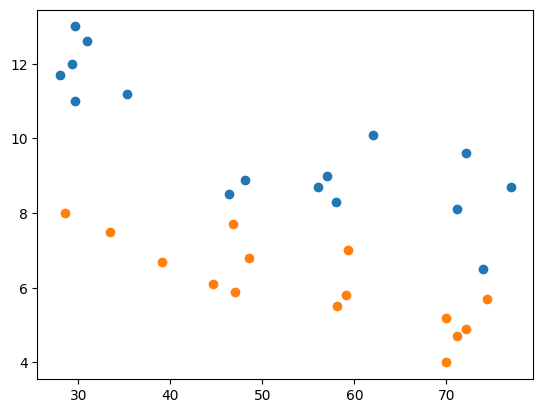

In [24]:
split1 = data[data["type"]== 1]
split0 = data[data["type"]== 0]
X_1 = split1["Relative humidity (%)"]
X_0 = split0["Relative humidity (%)"]

Y_1 = split1["Evaporation (% wt)"]
Y_0 = split0["Evaporation (% wt)"]

plt.scatter(X_1, Y_1)
plt.scatter(X_0, Y_0)

<Axes: xlabel='Relative humidity (%)', ylabel='Evaporation (% wt)'>

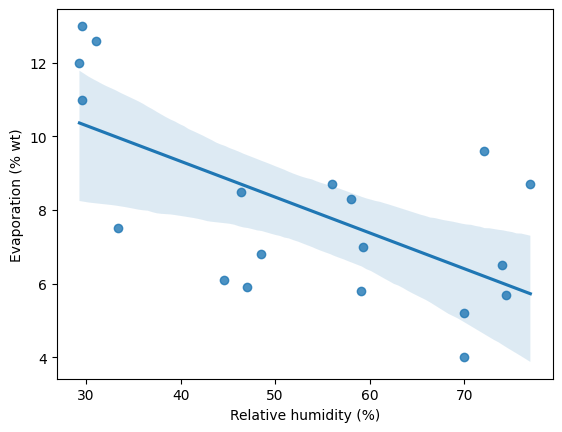

In [25]:
val = data.sample(frac=0.4, random_state=42, replace=False)
data = data.drop(val.index)

Y = data["Evaporation (% wt)"]

X = data["Relative humidity (%)"]

data.insert(0, "Intercept", 1)

sns.regplot(x = X, y = Y)

In [26]:
X = data.drop("Evaporation (% wt)", axis="columns")

In [27]:
b = np.linalg.inv(X.T @ X) @ X.T @ Y
b

0    10.430702
1    -0.078760
2     3.420939
dtype: float64

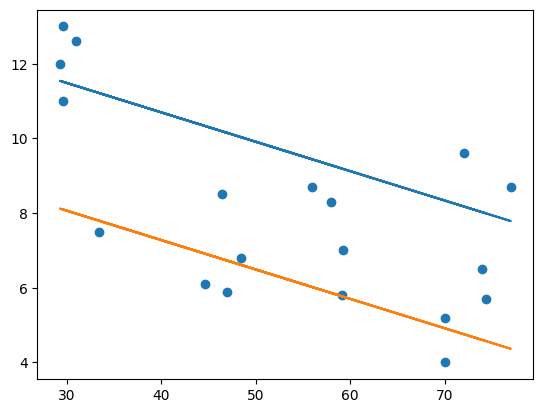

In [28]:
modA = np.append(b[0] + b[2], b[1:2])
modB = b[0:2]
X = X.to_numpy()
Y = Y.to_numpy()
Xr = X[:, 0:2]
x = Xr[:, 1:2]

plt.scatter(x, Y)
plt.plot(x, Xr @ modA)
plt.plot(x, Xr @ modB)

In [ ]:
Y = test["Evaporation (% wt)"]
X = test["Relative humidity (%)"]
T = test["type"]
correct = True



SyntaxError: invalid syntax (2823953135.py, line 1)